In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

In [2]:
############ DATA & TRANSFORMS

from data import get_data
from device import get_device

device = get_device(force_cpu=False)


horizontal_flip_prob = 0.2
vertical_flip_prob = 0.0
gaussian_blur_prob = 0.0
rotate_degree = 20
cutout = 0.3
#
transform_args = {}


transform_args['horizontal_flip_prob'] =  0.2
transform_args['vertical_flip_prob'] = 0.0
transform_args['gaussian_blur_prob'] = 0.0
transform_args['rotate_degree'] = 20
transform_args['cutout'] = 0.3
transform_args['cutout_height'] = 16
transform_args['cutout_width'] = 16


train_loader, test_loader = get_data(device,transform_args,batch_size=64 )

Files already downloaded and verified
Files already downloaded and verified


In [3]:
train_loader.dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [4]:
train_loader.dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Split: train
    Root Location: ./data
    Transforms (if any): <data.Transforms object at 0x000001B51B840BE0>
    Target Transforms (if any): None

In [5]:
##################### MODEL

from resnet_build import ResNet18
from torchsummary import summary
model = ResNet18().to(device)

summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

C:\Users\saina\Anaconda3\envs\pytorchenv\lib\site-packages\torch_lr_finder\lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm



Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 3.68E-02


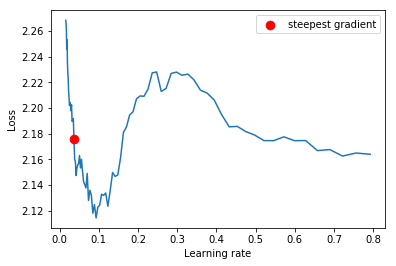

In [6]:
import torch.optim as optim
from torch_lr_finder import LRFinder

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
    
lr_finder.range_test(train_loader, end_lr=1, num_iter=100)
# lr_finder.range_test(train_loader, val_loader=test_loader, end_lr=1, num_iter=100, step_mode = step_mode)
lr_finder.plot(log_lr=False)
lr_finder.reset()

In [6]:
%load_ext autoreload
%autoreload 2

# import importlib
# importlib.reload(my_module)

from run import run_model_test

lr = 3.68E-02
epochs = 20
regularization = {'l1_factor':0,'l2_factor':0}

model,train_trackers,test_trackers,incorrect_samples,test_lrs = run_model_test(model, train_loader, test_loader, epochs, device, lr, **regularization)

*

Epoch 1:
(TRAIN) batch_number:  100 Loss : 1.875 Acc : 0.24531
(TRAIN) batch_number:  200 Loss : 1.709 Acc : 0.30055
(TRAIN) batch_number:  300 Loss : 1.524 Acc : 0.33375
(TRAIN) batch_number:  400 Loss : 1.404 Acc : 0.3632
(TRAIN) batch_number:  500 Loss : 1.479 Acc : 0.38556
(TRAIN) batch_number:  600 Loss : 1.296 Acc : 0.40594
(TRAIN) batch_number:  700 Loss : 1.434 Acc : 0.42239
(TEST) Correct_classified :  5410  of 10000
(TEST) Loss : 1.267 Acc : 0.541

 ************************************************************ 


Epoch 2:
(TRAIN) batch_number:  100 Loss : 1.313 Acc : 0.47109
(TRAIN) batch_number:  200 Loss : 1.281 Acc : 0.49562
(TRAIN) batch_number:  300 Loss : 1.136 Acc : 0.51406
(TRAIN) batch_number:  400 Loss : 1.085 Acc : 0.53359
(TRAIN) batch_number:  500 Loss : 0.8544 Acc : 0.55106
(TRAIN) batch_number:  600 Loss : 0.8718 Acc : 0.56466
(TRAIN) batch_number:  700 Loss : 0.8971 Acc : 0.57797
(TEST) Correct_classified :  6971  of 10000
(TEST) Loss : 0.876 Acc : 0.6971

 

(TRAIN) batch_number:  400 Loss : 0.2327 Acc : 0.90977
(TRAIN) batch_number:  500 Loss : 0.2117 Acc : 0.90838
(TRAIN) batch_number:  600 Loss : 0.3212 Acc : 0.90742
(TRAIN) batch_number:  700 Loss : 0.1918 Acc : 0.90734
(TEST) Correct_classified :  8832  of 10000
(TEST) Loss : 0.3639 Acc : 0.8832

 ************************************************************ 


Epoch 17:
(TRAIN) batch_number:  100 Loss : 0.2512 Acc : 0.91828
(TRAIN) batch_number:  200 Loss : 0.2553 Acc : 0.9157
(TRAIN) batch_number:  300 Loss : 0.1721 Acc : 0.91802
(TRAIN) batch_number:  400 Loss : 0.2801 Acc : 0.91598
(TRAIN) batch_number:  500 Loss : 0.3312 Acc : 0.91541
(TRAIN) batch_number:  600 Loss : 0.2635 Acc : 0.91435
(TRAIN) batch_number:  700 Loss : 0.2439 Acc : 0.9133
(TEST) Correct_classified :  8743  of 10000
(TEST) Loss : 0.3951 Acc : 0.8743

 ************************************************************ 


Epoch 18:
(TRAIN) batch_number:  100 Loss : 0.2586 Acc : 0.93531
(TRAIN) batch_number:  200 Loss : 

Text(0, 0.5, 'LR')

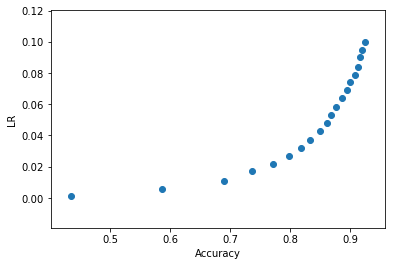

In [7]:
import matplotlib.pyplot as plt
plt.scatter(train_trackers['train_acc'],test_lrs)
plt.xlabel('Accuracy')
plt.ylabel('LR')

## DAVID NET

In [5]:
##################### MODEL

from resnet_build import David_net
from torchsummary import summary
model = David_net().to(device)

summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 15, 15]               0
       BatchNorm2d-6          [-1, 128, 15, 15]             256
              ReLU-7          [-1, 128, 15, 15]               0
            Conv2d-8          [-1, 128, 15, 15]         147,456
       BatchNorm2d-9          [-1, 128, 15, 15]             256
           Conv2d-10          [-1, 128, 15, 15]         147,456
      BatchNorm2d-11          [-1, 128, 15, 15]             256
       BasicBlock-12          [-1, 128, 15, 15]               0
           Conv2d-13          [-1, 256, 21, 21]         294,912
        MaxPool2d-14          [-1, 256,

In [6]:
torch.__version__

'1.1.0'

In [9]:
!pip install --upgrade torch

  Found existing installation: torch 1.1.0
    Uninstalling torch-1.1.0:
      Successfully uninstalled torch-1.1.0


Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\saina\\anaconda3\\envs\\pytorchenv\\lib\\site-packages\\~orch\\lib\\c10.dll'
Consider using the `--user` option or check the permissions.



In [7]:
%load_ext autoreload
%autoreload 2
from run import run_model


from torch.optim import lr_scheduler

lr = 3.68E-02
epochs = 50
regularization = {'l1_factor':0,'l2_factor':0}

# It is common practice to use the batch size as the steps per epoch
#https://towardsdatascience.com/super-convergence-with-just-pytorch-c223c0fc1e51
#https://www.kaggle.com/residentmario/one-cycle-learning-rate-schedulers


# scheduler = lr_scheduler.OneCycleLR(optimizer, max_lr = lr, epochs=24, steps_per_epoch= 64, pct_start = 0.2) # 24(total epochs) 5(max)

model,train_trackers,test_trackers,incorrect_samples = run_model(model, train_loader, test_loader, epochs, device, lr, **regularization)

TypeError: __init__() takes from 2 to 3 positional arguments but 4 were given

In [ ]:
torch.save(model.state_dict() , 'C://Users//saina//Documents//EVA//S10//trained50ep.pt') 

In [ ]:
import matplotlib.pyplot as plt

metric = 'LOSS'
# Initialize a figure
fig = plt.figure(figsize=(8, 6))

# Plot values
plain_plt, = plt.plot(train_trackers['train_losses'], color='cyan', label='Train')
plain_plt, = plt.plot(test_trackers['test_losses' ], color='red', label='Test')

# Set plot title
plt.title(f'Validation {metric}')
plt.title(f'Validation {metric}')

# Label axes
plt.xlabel('Epoch')
plt.ylabel(metric)

plt.legend()

plt.savefig('.\\loss.png')

# Set legend
location = 'upper' if metric == 'Loss' else 'lower'

# INCORRECT

In [22]:
from gradcam import ModelGradCam ,gradcam_out
%load_ext autoreload
%autoreload 2

x,y,z = gradcam_out(model,incorrect_samples[10],device)
x.shape

Image Written


(32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


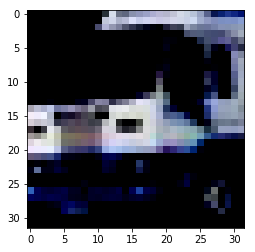

In [38]:
import matplotlib.pyplot as plt

i = img_d['image'].cpu().data.numpy()

i2 = np.transpose(i,(1,2,0))

plt.imshow(i2)

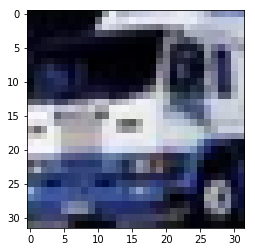

In [39]:
new_arr = ((i2 - i2.min()) * (1/(i2.max() - i2.min()) * 255)).astype('uint8')
plt.imshow(new_arr)

# PLOT MISCLASSIIFIED IMG WITH GRADCAM ON TOP

Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written
Image Written


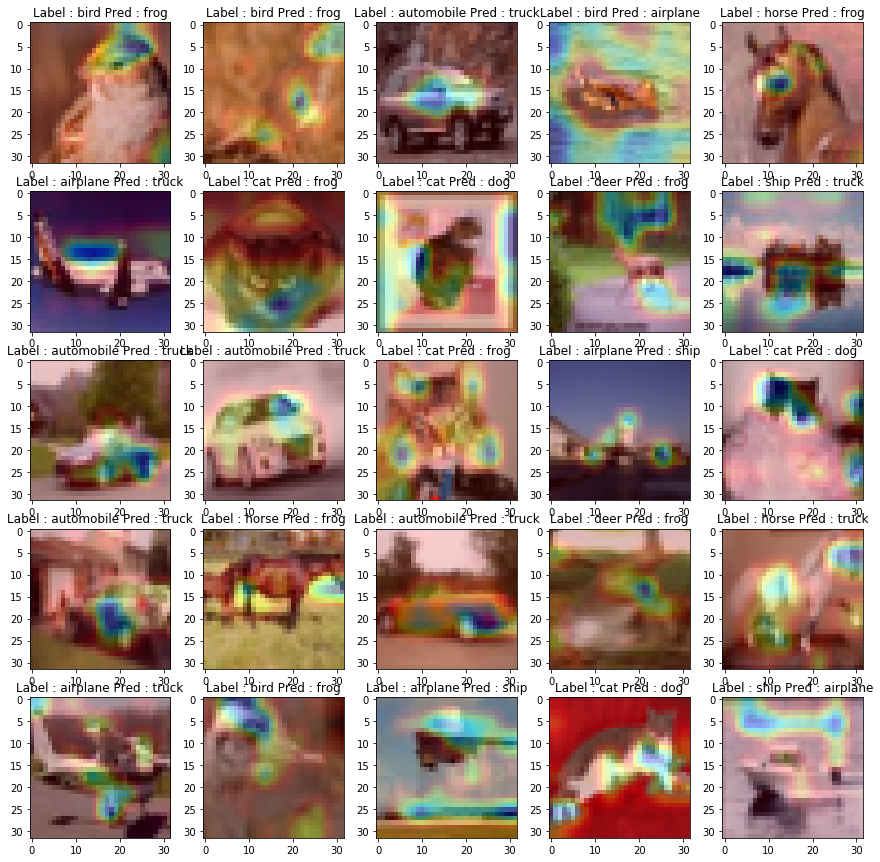

In [24]:
import numpy as np
import matplotlib.pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 5

# ax enables access to manipulate each of subplots
ax = []

for i in range(len(incorrect_samples[:25])):
    img,lab,pred = gradcam_out(model,incorrect_samples[i],device)
    
    # create subplot and append to ax
    ax.append(fig.add_subplot(rows, columns, i+1) )
    new_arr = ((img - img.min()) * (1/(img.max() - img.min()) * 255)).astype('uint8')
    ax[-1].set_title("Label : "+ lab + " Pred : " + pred)  # set title
    plt.imshow(new_arr)

fig.savefig(f'.\\Incorrect_GC\\incorrect_predictions.png', bbox_inches='tight')
plt.show()  # finally, render the plot